# Capstone 2 Data Wrangling

In [82]:
#Import pandas, matplotlib.pyplot, and seaborn 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

In [5]:
# load the data
stroke_data = pd.read_csv(r'..\CapstoneTwo\healthcare-dataset-stroke-data.csv')

In [6]:
#Call the info method on stroke_data to see a summary of the data
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
# Count NaNs
missing = pd.concat([stroke_data.isnull().sum(), 100 * stroke_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


The only missing values in the data lie within the bmi column. These NaNs account for 3.9% of the total data. We will need to decide what to do with these observations, whether we remove them completely or fill them in with a calculated value.

In [10]:
# Identify categorical features
stroke_data.select_dtypes(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [11]:
# Determine unique categorical variables
stroke_data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']].nunique()

gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [13]:
# Should there be 3 genders?
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [46]:
# Count stroke values
stroke = pd.Series([stroke_data['stroke'].sum(), stroke_data['stroke'].sum()/stroke_data['stroke'].count() * 100], index=['count', '%'], name="stroke")
non_stroke = pd.Series([stroke_data['stroke'].count() - stroke_data['stroke'].sum(), 100 - (stroke_data['stroke'].sum()/stroke_data['stroke'].count() * 100)], index=['count', '%'], name="non_stroke")
pd.concat([stroke, non_stroke], axis=1)

,stroke,non_stroke
count,249.000000,4861.000000
%,4.872798,95.127202


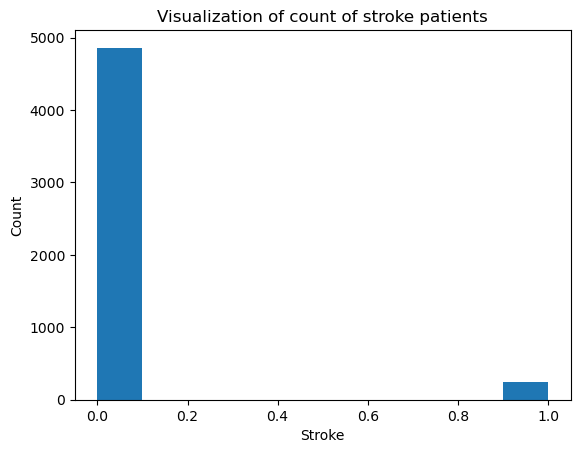

In [47]:
# histogram to show distribution of strokes in population
plt.hist(x=stroke_data['stroke'])
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title("Visualization of count of stroke patients")
plt.show()

The decision variable, stroke value, is very skewed. The number of patients that didn't have a stroke outweighs stroke victims by approximately 19:1

In [48]:
# show summary statistics for data features
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


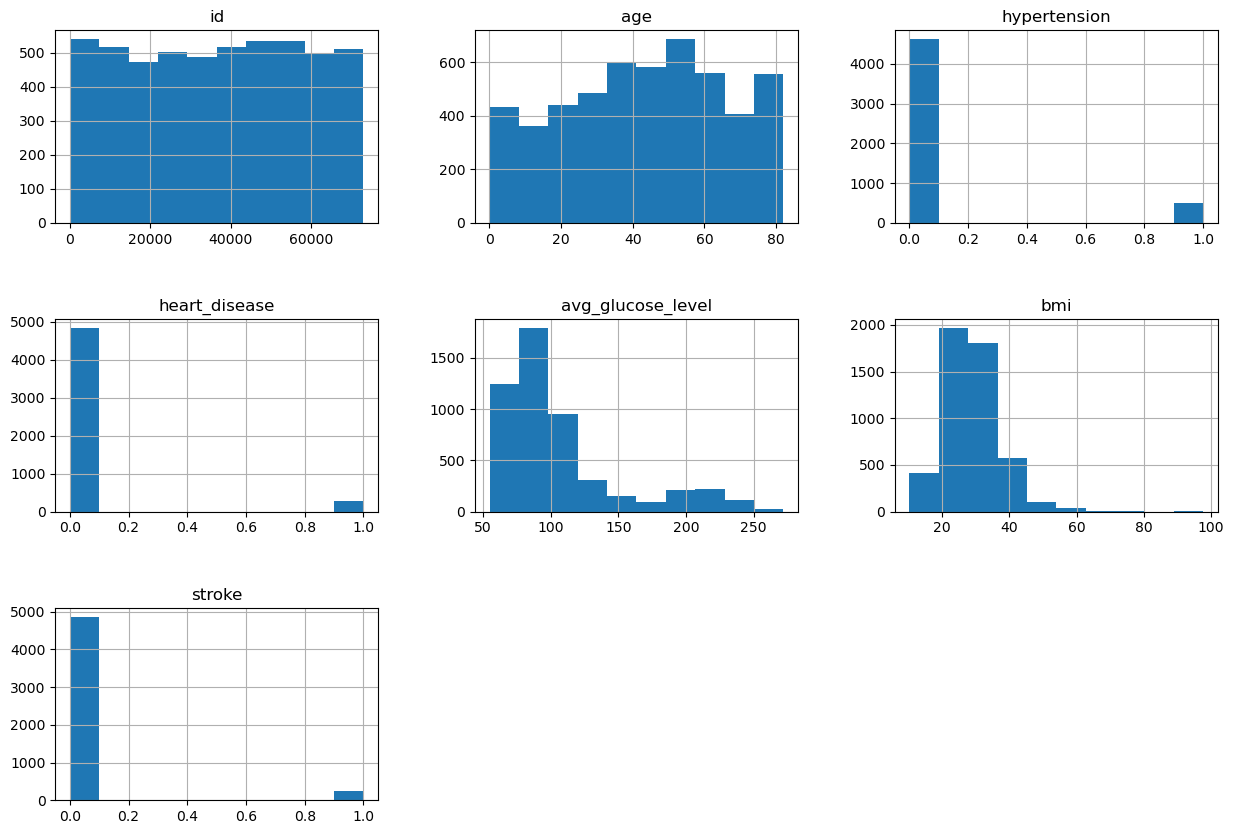

In [49]:
# display distributions for data features
stroke_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

From these histograms, we can see that hypertension, heart_disease, avg_glucose_level, and stroke are all skewed-right. The id histogram doesn't make sense here, since it is really a categorical variable. The ages appear to span a wide range in an evenly distributed way and the bmi values appear to be normally distributed with some outliers on the right. 

In [50]:
# zoom into the bmi outliers
stroke_data.loc[stroke_data.bmi > 80]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [57]:
# convert categorical to numeric to see distributions
stroke_data_num = stroke_data.copy()
stroke_data_num['gender'].replace(['Male', 'Female', 'Other'],
                        [0, 1, 2], inplace=True)
stroke_data_num['ever_married'].replace(['No', 'Yes'],
                        [0, 1], inplace=True)
stroke_data_num['work_type'].replace(['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'],
                        [0, 1, 2, 3, 4], inplace=True)
stroke_data_num['Residence_type'].replace(['Urban', 'Rural'],
                        [0, 1], inplace=True)
stroke_data_num['smoking_status'].replace(['never smoked', 'Unknown', 'formerly smoked', 'smokes'],
                        [0, 1, 2, 3], inplace=True)
stroke_data_num.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,0,228.69,36.6,2,1
1,51676,1,61.0,0,0,1,1,1,202.21,NaN,0,1
2,31112,0,80.0,0,1,1,0,1,105.92,32.5,0,1
3,60182,1,49.0,0,0,1,0,0,171.23,34.4,3,1
4,1665,1,79.0,1,0,1,1,1,174.12,24.0,0,1


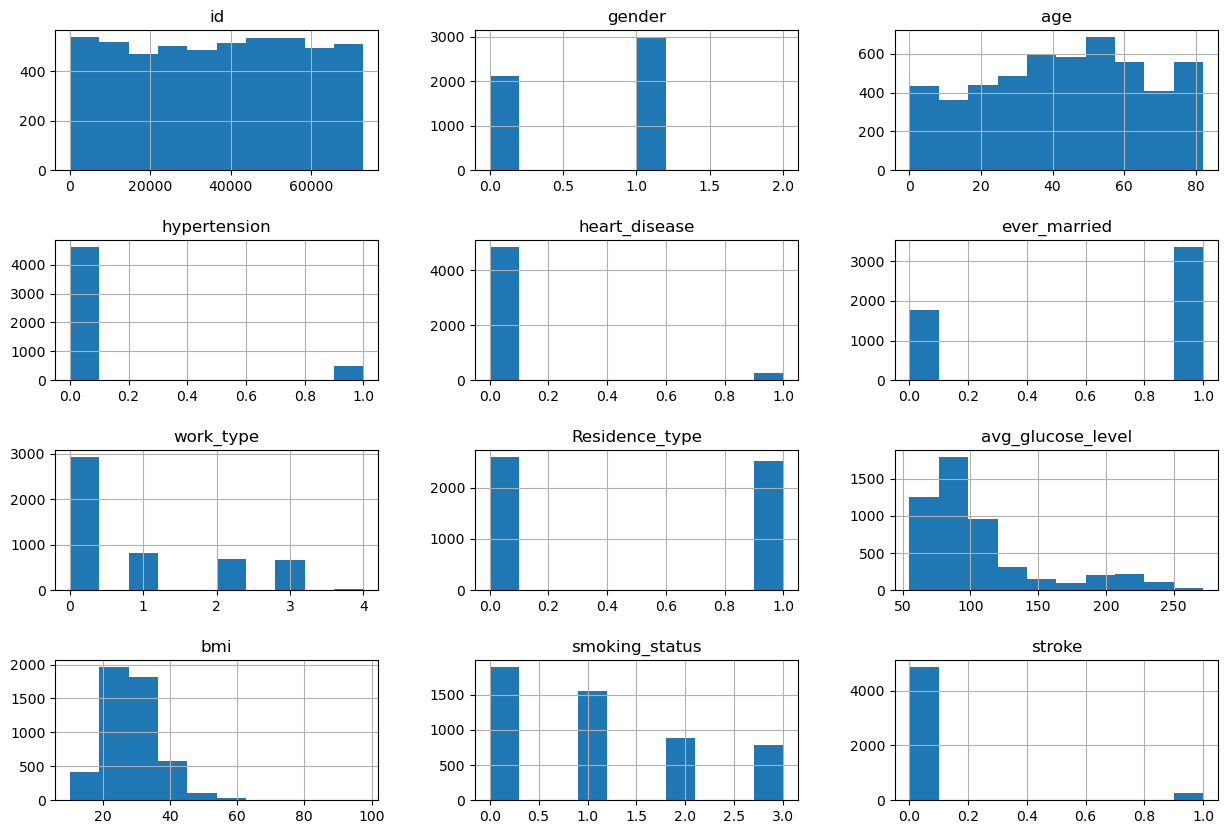

In [58]:
# display distributions for all features (including categorical)
stroke_data_num.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

We can see from the categorical variables that there are slightly more females, a majority of the observations are married, a majority of the observations work in the private sector, it is almost an even split between living in urban vs rural, and the majority of the observations either don't smoke or it is unknown.

In [66]:
# Since bmi appears to be normally distributed (besides the couple outliers), I will replace NaNs with the median value.
stroke_data_num['bmi'].fillna(stroke_data_num['bmi'].median(), inplace=True)

# check that all nulls are removed
stroke_data_num['bmi'].isnull().sum()

0

<AxesSubplot:>

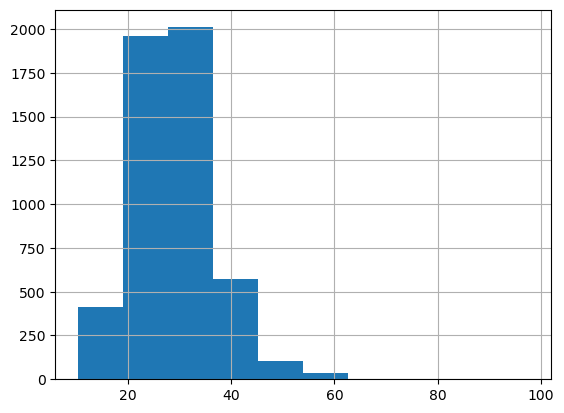

In [77]:
# updated bmi distribution
stroke_data_num['bmi'].hist()

In [68]:
# Since there is only one 'Other' gender value, I will remove it
stroke_data_num = stroke_data_num[stroke_data_num['gender'] != 2]
stroke_data_num['gender'].value_counts()

1    2994
0    2115
Name: gender, dtype: int64

In [69]:
# Make sure all ID's are unique
len(pd.unique(stroke_data_num['id'])) == stroke_data_num['id'].count()

True

In [83]:
# save the data to a new csv file
datapath = r'C:\Users\tscofield\Documents\Git\SpringboardGit\CapstoneTwo'
save_file(stroke_data_num, 'stroke_data_cleaned.csv', datapath)

Writing file.  "C:\Users\tscofield\Documents\Git\SpringboardGit\CapstoneTwo\stroke_data_cleaned.csv"


In this data wrangling, I explored the stroke data features to identify outliers, data types, and to get a better overall feal for the data. I examined the distributions for each feature and response variable in the data. I found that the response variable (stroke variable) is imbalanced with a majority not having a stroke. Later, we will determine if the classes are too imbalanced and if any upsampling needs to be included. The only null values in this dataset were in the 'bmi' feature, where approximately 4% of them were null. To solve this, I replaced the null values with the data median because the bmi distribution was approximately normally distributed. Next, I converted all categorical features to numerical so that they can be used in future modeling. There was one observation with an 'other' gender, I removed this for data clarity. Lastly, there were only two distinct outliers in the data, two observations with bmi values greater than 